
# K-Nearest Neighbors


**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import opendatasets as od
from sklearn import preprocessing
%matplotlib inline


In [2]:
od.download("https://www.kaggle.com/datasets/prathamtripathi/customersegmentation")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  sumitk87549


Your Kaggle Key:

  ········


100%|██████████| 9.62k/9.62k [00:00<00:00, 419kB/s]

In [5]:
df_raw = pd.read_csv("customersegmentation/Telecust1.csv",encoding="ISO-8859-1")
df_raw.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1000 non-null   int64 
 1   tenure   1000 non-null   int64 
 2   age      1000 non-null   int64 
 3   income   1000 non-null   int64 
 4   marital  1000 non-null   int64 
 5   address  1000 non-null   int64 
 6   ed       1000 non-null   int64 
 7   employ   1000 non-null   int64 
 8   retire   1000 non-null   int64 
 9   gender   1000 non-null   int64 
 10  reside   1000 non-null   int64 
 11  custcat  1000 non-null   object
dtypes: int64(11), object(1)
memory usage: 93.9+ KB


In [7]:
df_raw.custcat.value_counts()

C    281
A    266
D    236
B    217
Name: custcat, dtype: int64

In [9]:
encoder = preprocessing.LabelEncoder()
df_raw.custcat = encoder.fit_transform(df_raw.custcat)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   region   1000 non-null   int64
 1   tenure   1000 non-null   int64
 2   age      1000 non-null   int64
 3   income   1000 non-null   int64
 4   marital  1000 non-null   int64
 5   address  1000 non-null   int64
 6   ed       1000 non-null   int64
 7   employ   1000 non-null   int64
 8   retire   1000 non-null   int64
 9   gender   1000 non-null   int64
 10  reside   1000 non-null   int64
 11  custcat  1000 non-null   int32
dtypes: int32(1), int64(11)
memory usage: 90.0 KB


In [10]:
df_raw.custcat.value_counts()

2    281
0    266
3    236
1    217
Name: custcat, dtype: int64

In [11]:
cust = df_raw

array([[<Axes: title={'center': 'income'}>]], dtype=object)

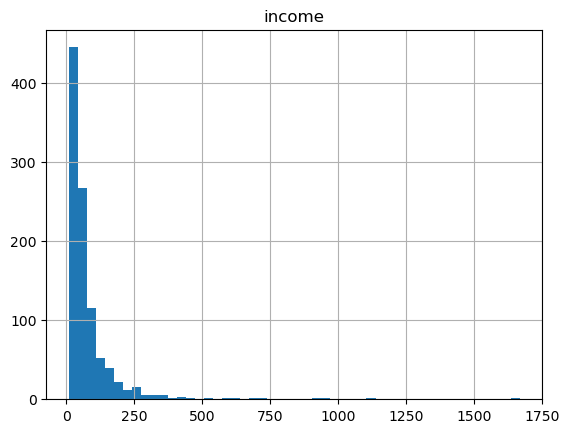

In [12]:
cust.hist(column='income',bins=50)

In [13]:
X = cust.values

In [14]:
X

array([[ 2, 13, 44, ...,  0,  2,  0],
       [ 3, 11, 33, ...,  0,  6,  3],
       [ 3, 68, 52, ...,  1,  2,  2],
       ...,
       [ 3, 67, 59, ...,  1,  1,  3],
       [ 3, 70, 49, ...,  1,  1,  2],
       [ 3, 50, 36, ...,  1,  3,  1]], dtype=int64)

In [15]:
Y = cust.custcat.values

In [17]:
Y[0:5]

array([0, 3, 2, 0, 2])

In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456, -0.12650641,  1.0100505 ,
        -0.25303431,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  0.54644972,  1.0100505 ,
        -0.4514148 ,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  0.35951747,  1.0100505 ,
         1.23481934, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.41625141, -0.9900495 ,
         0.04453642, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797, -0.44429125,  1.0100505 ,
        -0.25303431, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)

In [24]:
y_hat = neigh.predict(x_test)


In [28]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.82875
Test set Accuracy:  0.735


In [29]:
krange = 21

mean_acc = np.zeros((krange-1))
std_acc = np.zeros((krange-1))

for i in range(1,krange):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[i-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
    
mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765,
       0.79 , 0.795, 0.79 , 0.8  , 0.775, 0.775, 0.775, 0.77 , 0.775,
       0.78 , 0.79 ])

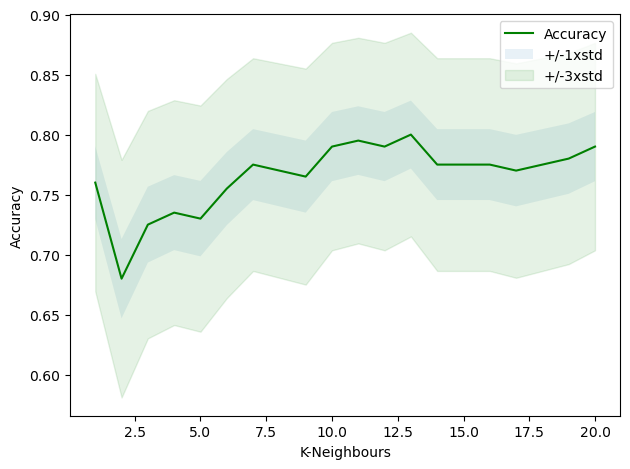

In [30]:
#Plotting Accuracy
plt.plot(range(1,krange), mean_acc, 'g')
plt.fill_between(range(1,krange), mean_acc-1*std_acc, mean_acc+1*std_acc, alpha =0.1)
plt.fill_between(range(1,krange), mean_acc-3*std_acc, mean_acc+3*std_acc, alpha =0.1, color='green')
plt.legend(('Accuracy','+/-1xstd','+/-3xstd'))
plt.xlabel('K-Neighbours')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [31]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8 with k= 13
